<a href="https://colab.research.google.com/github/johng02/lab8/blob/main/Laboratorio_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratorio 8: Implementación algoritmo de regresión lineal
**Facultad de ingeniería, departamento de Ingeniería Biomédica, Universidad de los Andes**\
**IBIO-2440 Programación científica**

# Nueva sección

**Nombres de los integrantes**


1.   John gomez
2.   Nombre integrante 2

**Número del grupo**

*Escribir el número del grupo*

# **Regresión lineal**

Considere el conjunto de puntos:\
 $(x^{(1)},y^{(1)}), (x^{(2)},y^{(2)}), ... , (x^{(m)},y^{(m)})$,

donde se asume que se relacionan a través de la ecuación:
\begin{align*}
  y^{(i)} \approx β_{1} + &x^{(i)}β_{2}\\
 \end{align*}
Encontrar $\beta=[\beta_1,\beta_1]^T$ se resuelve a través de la solución del problema de mínimos cuadrados:
\begin{align*}
  \min_\beta ||y-H\beta||_2^2,
 \end{align*}
donde $y$ y $H$ se contruyen a partir de los datos como se vio en clase. La solución analítica de este problema tiene la forma:
\begin{align*}
  \beta^* =  (H^TH)^{-1}H^Ty
 \end{align*}
 
Ahora, sigua los siguientes pasos:

1. Teniendo en cuenta los datos anexados en la actividad en archivo excel, use la libreria *pandas* para procesarlos y trabajar con ellos. La primera columna corresponde a los valores de $x$ y la segunda a los valores de $y$.


In [5]:
import pandas as pd
import numpy as np
from numpy.linalg import inv
from numpy.linalg import norm
import matplotlib.pyplot as plt

df=pd.read_excel(r"Data.xlsx", header=None)
print(df)

        0          1
0     0.0   3.191590
1     0.1  -1.735428
2     0.2  -0.347611
3     0.3  -0.626006
4     0.4   1.867975
..    ...        ...
96    9.6  43.227739
97    9.7  43.686057
98    9.8  48.793988
99    9.9  52.387736
100  10.0  52.806588

[101 rows x 2 columns]


2. Construya la matriz $H$ y el vector $y$.

In [12]:
from pandas.core.internals.base import T
data=df.to_numpy()
x_f=data[:,0]
y=data[:,1]

ones=np.ones([np.size(x_f,0)])
h=np.vstack((ones,x_f))
h=h.T
print(h)

[[ 1.   0. ]
 [ 1.   0.1]
 [ 1.   0.2]
 [ 1.   0.3]
 [ 1.   0.4]
 [ 1.   0.5]
 [ 1.   0.6]
 [ 1.   0.7]
 [ 1.   0.8]
 [ 1.   0.9]
 [ 1.   1. ]
 [ 1.   1.1]
 [ 1.   1.2]
 [ 1.   1.3]
 [ 1.   1.4]
 [ 1.   1.5]
 [ 1.   1.6]
 [ 1.   1.7]
 [ 1.   1.8]
 [ 1.   1.9]
 [ 1.   2. ]
 [ 1.   2.1]
 [ 1.   2.2]
 [ 1.   2.3]
 [ 1.   2.4]
 [ 1.   2.5]
 [ 1.   2.6]
 [ 1.   2.7]
 [ 1.   2.8]
 [ 1.   2.9]
 [ 1.   3. ]
 [ 1.   3.1]
 [ 1.   3.2]
 [ 1.   3.3]
 [ 1.   3.4]
 [ 1.   3.5]
 [ 1.   3.6]
 [ 1.   3.7]
 [ 1.   3.8]
 [ 1.   3.9]
 [ 1.   4. ]
 [ 1.   4.1]
 [ 1.   4.2]
 [ 1.   4.3]
 [ 1.   4.4]
 [ 1.   4.5]
 [ 1.   4.6]
 [ 1.   4.7]
 [ 1.   4.8]
 [ 1.   4.9]
 [ 1.   5. ]
 [ 1.   5.1]
 [ 1.   5.2]
 [ 1.   5.3]
 [ 1.   5.4]
 [ 1.   5.5]
 [ 1.   5.6]
 [ 1.   5.7]
 [ 1.   5.8]
 [ 1.   5.9]
 [ 1.   6. ]
 [ 1.   6.1]
 [ 1.   6.2]
 [ 1.   6.3]
 [ 1.   6.4]
 [ 1.   6.5]
 [ 1.   6.6]
 [ 1.   6.7]
 [ 1.   6.8]
 [ 1.   6.9]
 [ 1.   7. ]
 [ 1.   7.1]
 [ 1.   7.2]
 [ 1.   7.3]
 [ 1.   7.4]
 [ 1.   7.5]
 [ 1.   7.6]

3. Encuentre los valores de $\beta^*$.

In [24]:
beta=inv(h.T@h)@h.T@y
print(beta)


[0.07893785 5.09970266]


4. Grafique la recta obtenida junto a los datos anexados.

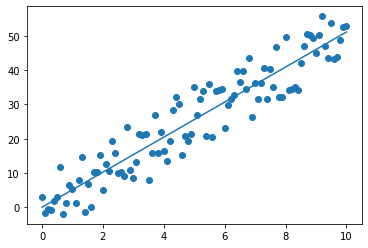

In [39]:
x_reg=np.linspace(0,10,10000)
y_reg=beta[0]+beta[1]*(x_reg)

plt.plot(x_reg,y_reg)
plt.scatter(x_f,y)



5. Con los coeficientes hallados, se desea comparar el error con otras dos parejas de coeficientes:

 - $\beta_a=[\beta_1^*+5, \beta_2^*-1]^T$
 - $\beta_b=[\beta_1^*-5, \beta_2^*+1]^T$.

Determine el valor de:

  \begin{align*}
  ||y-H\beta||_2^2
 \end{align*}

para $\beta^*$, $\beta_a$, y $\beta_b$. Aquí los valores de $y$ y $H$ son los mismos para todos ya que los datos no cambian. Explique los resultados obtenidos. 

In [40]:
ba=np.array((beta[0]+5, beta[1]-1)).T
b_b=np.array((beta[0]-5, beta[1]+1)).T
print(ba)
print(b_b)

[5.07893785 4.09970266]
[-4.92106215  6.09970266]


6. Grafique el las tres rectas (es decir, las obtenidas por $\beta^*$, $\beta_a$, y $\beta_b$)  junto a los datos anexados. En un scatter plot pinte los datos en el archivo, y pinte las tres rectas traslapadas con tres colores diferentes. Interprete los resultados obtenidos.

In [ ]:
x_reg=np.linspace(0,10,10000)
y_reg=beta[0]+beta[1]*(x_reg)


plt.plot(x_reg,y_reg)